In [1]:
# Lots of imports needed
import pandas as pd
import numpy as np
import geopandas as gpd
import json
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure, save
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, ColumnDataSource, HoverTool, LogColorMapper
from bokeh.palettes import brewer

In [2]:
data = pd.read_csv('../Data/Nigeria/cumulative_nigeria_data.csv')
data.head()

,Unnamed: 0,CONTINENT,REGION,ADMIN0,ADMIN1,IUs_NAME,Shape_Leng,Shape_Le_1,Shape_Area,geometry,...,end_year,Period,PopReq,PopTreat,Cov,MDA,EffMDA,MDA_n,EffMDA_n,MDA_left
0,0,Africa,Western Africa,Nigeria,Katsina,Batangarawa,151893.607155,151893.607155,4.668122e+08,"POLYGON ((7.549513999850082 12.71985050919944,...",...,2017,Annual,193743,168228,86.830492,1,1,1,1,4
1,1,Africa,Western Africa,Nigeria,Katsina,Batangarawa,151893.607155,151893.607155,4.668122e+08,"POLYGON ((7.549513999850082 12.71985050919944,...",...,2017,Annual,219357,215541,98.260370,1,1,1,1,3
2,2,Africa,Western Africa,Nigeria,Katsina,Batangarawa,151893.607155,151893.607155,4.668122e+08,"POLYGON ((7.549513999850082 12.71985050919944,...",...,2017,Annual,207231,211576,102.096694,1,1,1,1,2
3,3,Africa,Western Africa,Nigeria,Katsina,Batangarawa,151893.607155,151893.607155,4.668122e+08,"POLYGON ((7.549513999850082 12.71985050919944,...",...,2017,Annual,159923,147214,92.053051,1,1,1,1,4
4,4,Africa,Western Africa,Nigeria,Katsina,Batangarawa,151893.607155,151893.607155,4.668122e+08,"POLYGON ((7.549513999850082 12.71985050919944,...",...,2017,Annual,144448,142665,98.765646,1,1,1,1,3


In [5]:
def getLineCoords(row, geom, coord_type):
    # Parse the exterior of the coordinate
    if coord_type == 'x':
        return list( row[geom].coords.xy[0] )
    elif coord_type == 'y':
        return list( row[geom].coords.xy[1] )

In [6]:
data['x'] = data.apply(getLineCoords, geom='geometry', coord_type='x', axis=1)
data['y'] = data.apply(getLineCoords, geom='geometry', coord_type='y', axis=1)

AttributeError: 'str' object has no attribute 'coords'

AttributeError: Unknown property column

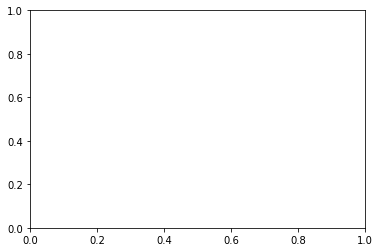

In [11]:
data.plot(column='lf_yld')